<a href="https://colab.research.google.com/github/Hf301/Hf301/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Математическая оптимизация

### Дана функция $y(x) = x^{3} \ln(x)$


In [ ]:
from sympy import diff, symbols, cos, sin, log
from sympy.algebras.quaternion import ln
import math
x, y = symbols('x y')
diff((x ** 3) * ln(x))

3*x**2*log(x) + x**2

Реализуем функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
from tqdm.notebook import tqdm
from numpy import asarray
from numpy import arange
from numpy.random import rand

In [ ]:
def dy(x):
  return  3 * x ** 2 * np.log(x) + x ** 2

In [ ]:
dy(2)

12.317766166719343

Реализуем функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(w0, func_grad, beta=0.01, alpha=0.01, tolerance=0.00001, n_iter=150):
    w = np.array(w0)
    history = [w]
    for iter_number in tqdm(range(n_iter)):
        grad = func_grad(w)
        w = w - alpha * grad
        if np.mean(abs(w - history[-1])) < tolerance:
            break
        history.append(w)
    return np.array(history)

In [ ]:
# Запускаем поиск минимума с любой точки, например с точки 10
history = get_min_with_gd(np.array([10]), dy, alpha=0.001, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
history

array([[10.        ],
       [ 9.20922447],
       [ 8.55952896],
       ...,
       [ 0.72115207],
       [ 0.72114204],
       [ 0.72113204]])

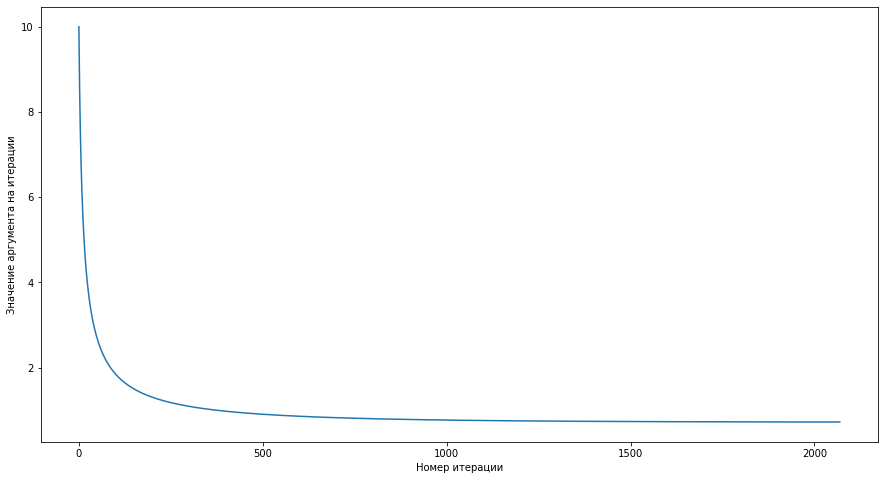

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(history)
plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

Реализуем поиск минимума при помощи алгоритма `RMSProp`. Реализуем функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_rmsprop(w0, func_grad, beta=0.01, alpha=0.01, tolerance=0.0001, n_iter=150):
    w = np.array(w0)
    eps = 0.0001
    history_rmsprop = [w]
    g = 0
    
    for iter_number in tqdm(range(n_iter)):
        grad = func_grad(w)

        g = (1-beta) * g + beta * grad ** 2

        w = w - (alpha / (g + eps) ** 0.5) * grad
        
        if np.mean(abs(w - history_rmsprop[-1])) < tolerance:
            break
        history_rmsprop.append(w)
    return np.array(history_rmsprop)


In [ ]:
# Запустим поиск минимума с нескольких точек, например с 0 и 2
history_rmsprop_1 = get_min_with_rmsprop(np.array([0]), dy, beta=0.01, alpha=0.01, n_iter=10000)
history_rmsprop_2 = get_min_with_rmsprop(np.array([2]), dy, beta=0.01, alpha=0.01, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-3-d48e348e3547>:2: RuntimeWarning: divide by zero encountered in log
  return  3 * x ** 2 * np.log(x) + x ** 2
<ipython-input-3-d48e348e3547>:2: RuntimeWarning: invalid value encountered in multiply
  return  3 * x ** 2 * np.log(x) + x ** 2


  0%|          | 0/10000 [00:00<?, ?it/s]

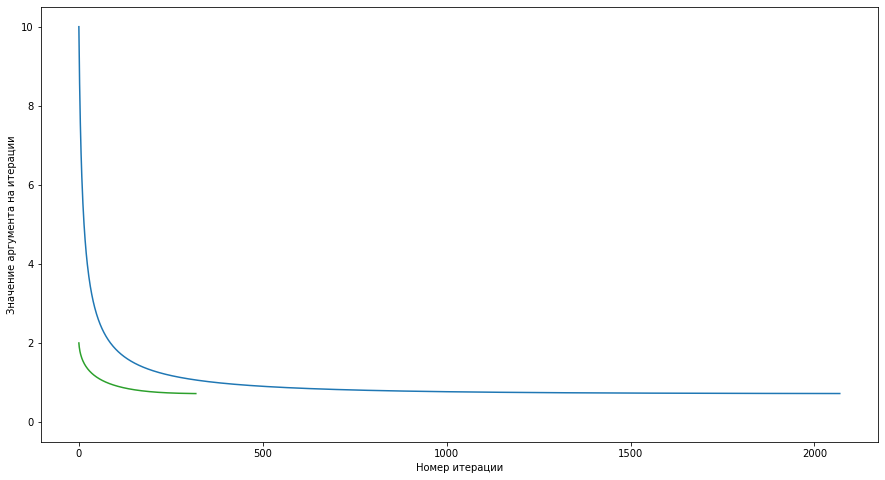

In [ ]:
plt.figure(figsize=(15, 8))
# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)
plt.plot(history_rmsprop_1)
plt.plot(history_rmsprop_2)
plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()